# <font color=Navy>Working with SciPy - Scientific Python

for more information visit the offcial website :https://scipy.org/

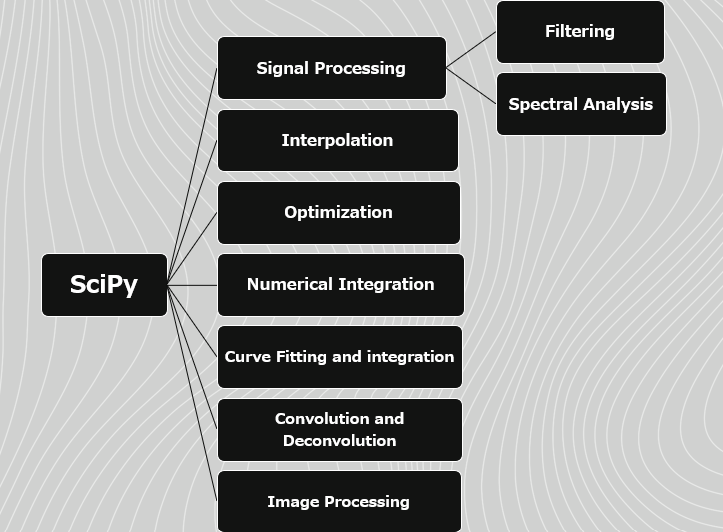

### <font color=Navy>Installation command

In [ ]:
#pip install scipy

In [ ]:
import numpy as np
from scipy import signal, datasets
import matplotlib.pyplot as plt

### <font color=Navy><b>Interpolation</b><br>
<font color=Navy>    Interpolation technique is used in the oil and gas industry for estimating unknown data points between known values. In this example, we demonstrate interpolating well pressure data from different depths, which is common in reservoir engineering and wellbore studies.

<font color=Navy><b>Known Data Points: </b>The known measurements for pressure and temperature are taken at specific depths (e.g., 1000 m, 1500 m, etc.).

In [12]:
# Depths in meters (known data points)
depths = np.array([1000, 1500, 2000, 2500, 3000]) 

# Pressure in psi (known data points corresponding to depths)
pressures = np.array([3500, 4000, 4500, 5000, 5500])

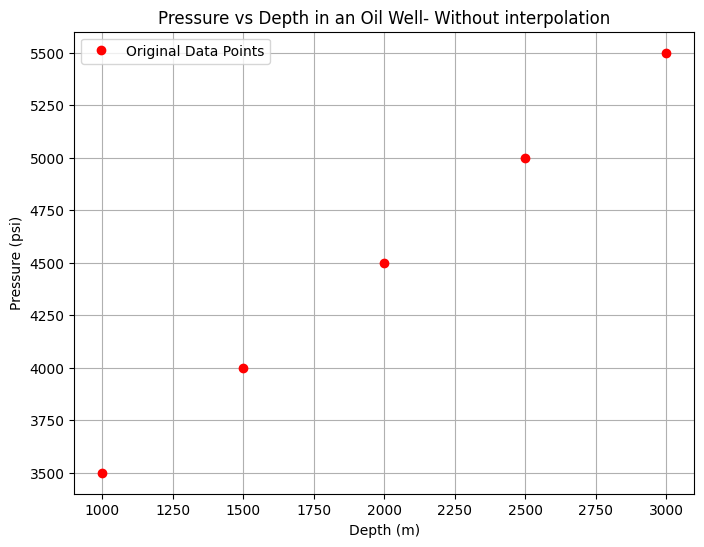

In [13]:
# Plotting the original data points and the interpolated curve
plt.figure(figsize=(8,6))
plt.plot(depths, pressures, 'o', label='Original Data Points', color='red')
plt.title('Pressure vs Depth in an Oil Well- Without interpolation')
plt.xlabel('Depth (m)')
plt.ylabel('Pressure (psi)')
plt.legend()
plt.grid(True)
plt.show()

<font color=Navy><b>Interpolation Functions:</b> We use interp1d() to create cubic spline interpolation functions for both pressure and temperature.<br>

In [ ]:
# Create an interpolation function using cubic spline
pressure_interpolation = interpolate.interp1d(depths, pressures, kind='cubic')

<font color=Navy><b>Interpolating Across Depths:</b> We generate a range of depths (from 1000 m to 3000 m) where we want to estimate pressure and temperature values. These unknown values are computed using the cubic interpolation method.<br>

In [ ]:
# Depths at which we want to estimate pressure (unknown data points)
depths_to_interpolate = np.linspace(1000, 3000, 100) 

# Perform the interpolation
interpolated_pressures = pressure_interpolation(depths_to_interpolate)

<font color=Navy><b>Visualization:</b> Two side-by-side plots are generated: one showing the pressure vs. depth and the other showing temperature vs. depth, with both measured and interpolated data.

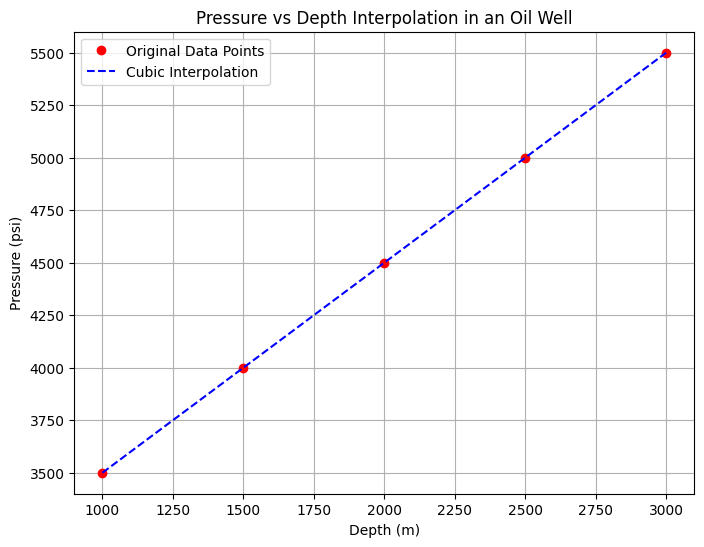

In [3]:
# Plotting the original data points and the interpolated curve
plt.figure(figsize=(8,6))
plt.plot(depths, pressures, 'o', label='Original Data Points', color='red')
plt.plot(depths_to_interpolate, interpolated_pressures, '--', label='Cubic Interpolation', color='blue')
plt.title('Pressure vs Depth Interpolation in an Oil Well')
plt.xlabel('Depth (m)')
plt.ylabel('Pressure (psi)')
plt.legend()
plt.grid(True)
plt.show()


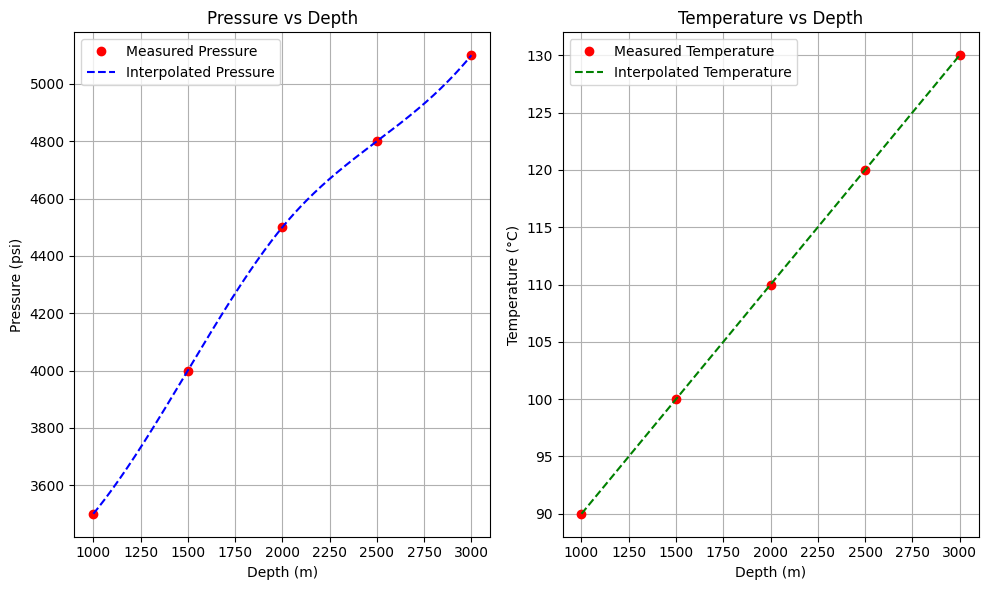

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# Known depths in meters (measured data points)
depths = np.array([1000, 1500, 2000, 2500, 3000])

# Known pressure values in psi at respective depths
pressures = np.array([3500, 4000, 4500, 4800, 5100])

# Known temperature values in degrees Celsius at respective depths
temperatures = np.array([90, 100, 110, 120, 130])

# Create interpolation functions for both pressure and temperature
pressure_interpolation = interpolate.interp1d(depths, pressures, kind='cubic')
temperature_interpolation = interpolate.interp1d(depths, temperatures, kind='cubic')

# Depths at which we want to interpolate reservoir properties (unknown points)
depths_to_interpolate = np.linspace(1000, 3000, 200)

# Interpolate pressure and temperature at new depths
interpolated_pressures = pressure_interpolation(depths_to_interpolate)
interpolated_temperatures = temperature_interpolation(depths_to_interpolate)

# Plotting Pressure vs Depth
plt.figure(figsize=(10, 6))

# Plot pressure interpolation
plt.subplot(1, 2, 1)
plt.plot(depths, pressures, 'o', label='Measured Pressure', color='red')
plt.plot(depths_to_interpolate, interpolated_pressures, '--', label='Interpolated Pressure', color='blue')
plt.title('Pressure vs Depth')
plt.xlabel('Depth (m)')
plt.ylabel('Pressure (psi)')
plt.legend()
plt.grid(True)

# Plot temperature interpolation
plt.subplot(1, 2, 2)
plt.plot(depths, temperatures, 'o', label='Measured Temperature', color='red')
plt.plot(depths_to_interpolate, interpolated_temperatures, '--', label='Interpolated Temperature', color='green')
plt.title('Temperature vs Depth')
plt.xlabel('Depth (m)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Show plots side by side
plt.tight_layout()
plt.show()


### <font color=Navy><b>B-Spline :</b>
 A B-spline is an approximation of a continuous function over a finite- domain in terms of B-spline coefficients and knot points.

<font color=Navy><b>Applications of B-splines in Oil and Gas:</b>
<b>Reservoir Characterization:</b> B-splines can be used to interpolate reservoir properties like porosity, permeability, or saturation across different depth intervals, providing a smooth estimate between measured data points.<br>
<b>Well Logging: </b>B-splines are used to create smooth approximations of well log data (e.g., porosity, resistivity, density) for more accurate modeling and interpretation of subsurface characteristics.<br>
<b>Reservoir Simulation Input:</b> Smooth curves created using B-splines can be input into reservoir simulation models, allowing engineers to make more accurate predictions about fluid flow and production over time.

<font color=Navy>
<b>Known Data Points:</b> The code uses a set of known depths and corresponding porosity values in a reservoir. Porosity values indicate how much fluid the rock can hold, which is crucial for estimating reserves.<br>
<b>B-Spline Interpolation:</b> The make_interp_spline() function from SciPy is used to create a smooth B-spline curve. The k=3 argument specifies a cubic B-spline, which provides a smooth and natural approximation to the data.<br>
<b>Fine Depth Intervals:</b> The depths_fine array represents a finer set of depth intervals between the minimum and maximum depths. This allows for a smoother curve to be generated.<br>
<b>Visualization:</b> The plot shows the original porosity data points as red circles and the smooth B-spline approximation as a blue curve.

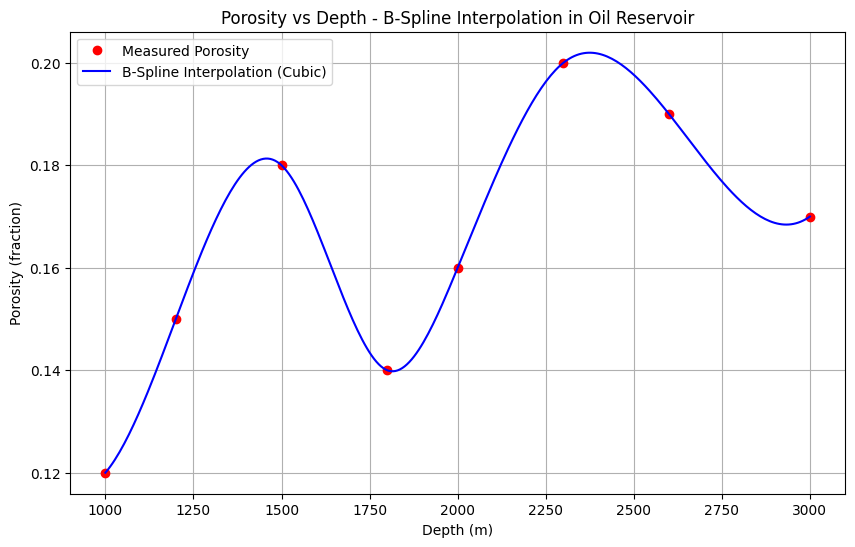

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Known depths in meters (measured data points)
depths = np.array([1000, 1200, 1500, 1800, 2000, 2300, 2600, 3000])

# Known porosity values at respective depths (fractional values, e.g., 0.15 for 15% porosity)
porosity = np.array([0.12, 0.15, 0.18, 0.14, 0.16, 0.20, 0.19, 0.17])

# Generate a finer set of depths for the smooth B-spline curve
depths_fine = np.linspace(depths.min(), depths.max(), 300)

# Create a B-spline representation of the porosity data
b_spline = make_interp_spline(depths, porosity, k=3)  # k=3 gives a cubic B-spline

# Use the B-spline to interpolate porosity values at the fine depth intervals
porosity_smooth = b_spline(depths_fine)

# Plotting the original porosity data points and the smooth B-spline curve
plt.figure(figsize=(10, 6))

# Original data points
plt.plot(depths, porosity, 'o', label='Measured Porosity', color='red')

# B-spline smooth curve
plt.plot(depths_fine, porosity_smooth, label='B-Spline Interpolation (Cubic)', color='blue')

# Titles and labels
plt.title('Porosity vs Depth - B-Spline Interpolation in Oil Reservoir')
plt.xlabel('Depth (m)')
plt.ylabel('Porosity (fraction)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


### <font color=Navy>Filtering

<font color=Navy>Filtering techniques are widely used in the oil and gas industry for processing and analyzing well log data, seismic data, and sensor readings. These filters help remove noise, smooth signals, or emphasize specific frequency ranges to improve the quality of the data for analysis and interpretation.<br>

In this example, we'll demonstrate how to use linear filtering in Python with SciPy to process noisy well log data (such as pressure or temperature readings from a wellbore).<br>
    We'll apply a simple low-pass filter to smooth out high-frequency noise.

<font color=navy><b>Applications in Oil and Gas:</b><br>
    <font color=navy>
<b>Well Log Data Smoothing: </b>This type of filtering can be used to smooth noisy well log data, such as pressure, temperature, or resistivity logs, providing cleaner signals for analysis.<br>
<b>Seismic Data Processing: </b>In seismic interpretation, filtering techniques are used to remove high-frequency noise and extract meaningful subsurface information.<br>
<b>Sensor Data Processing: </b>Filters can be applied to real-time sensor data from drilling operations or production monitoring to reduce noise and detect important trends.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt


In [ ]:
# Function to create a low-pass Butterworth filter
def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyquist  # Normalized cutoff frequency
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

<font color=Navy><b>Generate Synthetic Noisy well log data (Noisy Pressure Data)<br></b>
We generate synthetic well log data that represents pressure values along the depth of a wellbore, adding random noise to simulate real-world sensor imperfections.

In [ ]:
# Generate synthetic noisy well log data (pressure in psi)
np.random.seed(42)
depths = np.linspace(1000, 3000, 500)  # Depth range (1000m to 3000m)
true_pressure = 4000 + 50 * np.sin(depths / 300)  # True pressure curve with periodic variations
noise = np.random.normal(0, 50, size=depths.shape)  # Add some random noise
noisy_pressure = true_pressure + noise  # Noisy well log data

<font color=Navy><b>Butterworth Low-Pass Filter:</b><br>
<font color=Navy>
We define a butter_lowpass_filter() function that uses the Butterworth filter from scipy.signal.butter() to create a low-pass filter. The filter allows low-frequency signals (smooth trends) to pass while attenuating high-frequency noise.<br>
The function uses filtfilt() to apply the filter in both the forward and reverse directions, ensuring zero phase distortion in the output.<br>
<b>Filtering Parameters:<br></b>

The cutoff_frequency defines the threshold below which the frequency components are retained (low-pass).<br>
The sampling_rate is calculated based on the spacing between the depth measurements.

In [ ]:
# Filter parameters
cutoff_frequency = 0.01  # Cutoff frequency for low-pass filter
sampling_rate = 1 / (depths[1] - depths[0])  # Sampling rate (inverse of depth interval)

# Apply low-pass filter to smooth out noise
smoothed_pressure = butter_lowpass_filter(noisy_pressure, cutoff_frequency, sampling_rate)

<font color=Navy><b>Plot the Graph </b><br>


We plot both the noisy pressure data (in red) and the smoothed data after applying the low-pass filter (in blue). The blue curve represents the pressure signal with the noise removed.

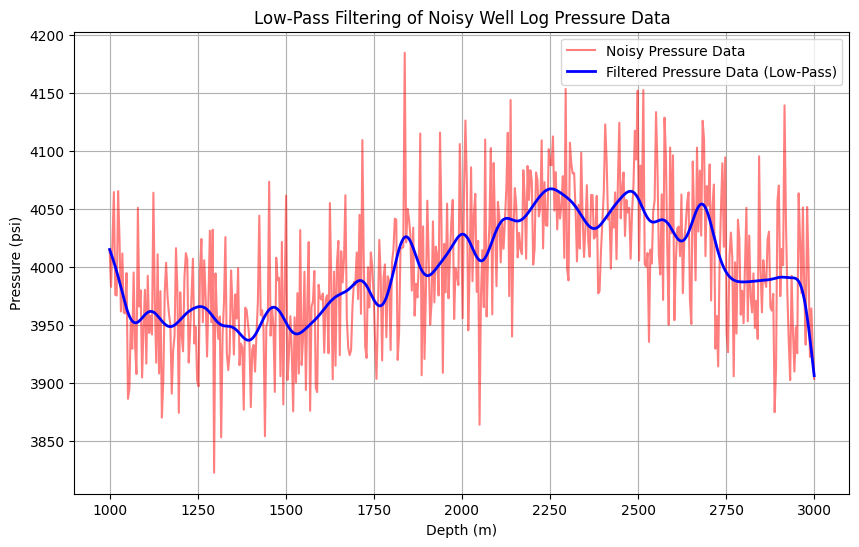

In [8]:
# Plotting the original noisy data and the filtered data
plt.figure(figsize=(10, 6))

# Original noisy pressure data
plt.plot(depths, noisy_pressure, label='Noisy Pressure Data', color='red', alpha=0.5)

# Smoothed pressure data after applying low-pass filter
plt.plot(depths, smoothed_pressure, label='Filtered Pressure Data (Low-Pass)', color='blue', linewidth=2)

# Titles and labels
plt.title('Low-Pass Filtering of Noisy Well Log Pressure Data')
plt.xlabel('Depth (m)')
plt.ylabel('Pressure (psi)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


### <font color=Navy>Spectral Analysis <br>
<font color=Navy>In the oil and gas industry, spectral analysis is commonly used in seismic data processing and interpretation.<br> By applying the Fourier transform to seismic signals, we can analyze the frequency content of the data, which helps identify subsurface structures like faults, reservoirs, and stratigraphic features.<br> Spectral analysis can also be applied to well log data and other signals to extract important frequency components.
<br>
Below is an example demonstrating spectral analysis on a synthetic seismic signal using SciPy. <br>The code generates a continuous sine wave signal with added noise, then performs a Fourier transform to investigate its spectral components.

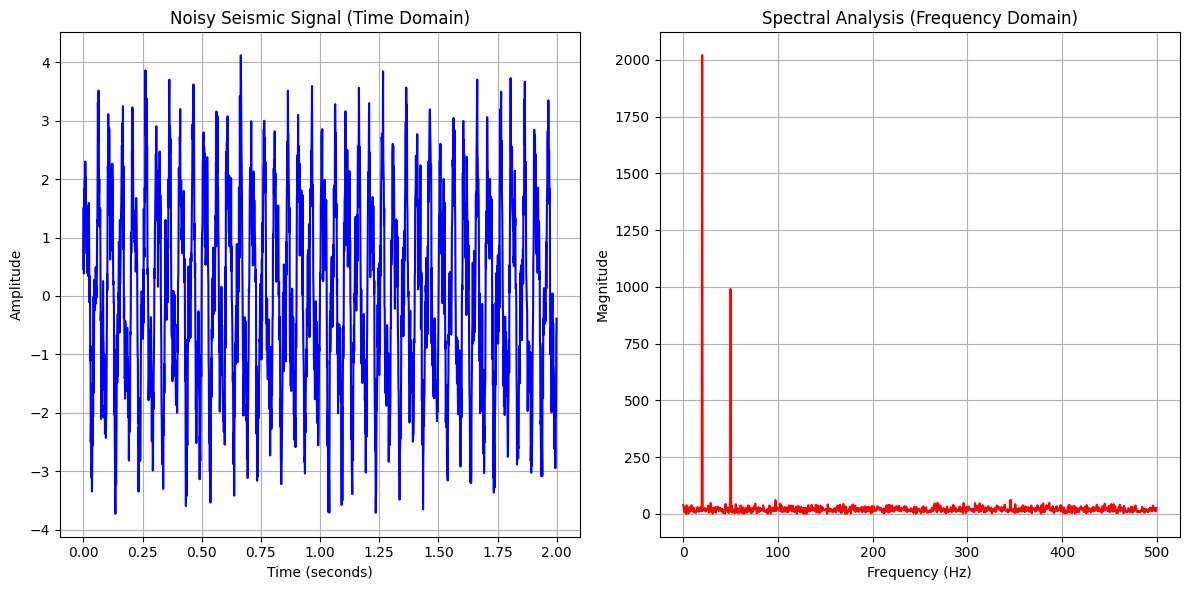

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parameters for the signal
sampling_rate = 1000  # Sampling rate in Hz (samples per second)
duration = 2.0  # Duration of the signal in seconds
frequency1 = 20  # Frequency component 1 (in Hz) for the sine wave
frequency2 = 50  # Frequency component 2 (in Hz) for the sine wave
noise_amplitude = 0.5  # Amplitude of noise

# Generate time points
t = np.linspace(0.0, duration, int(sampling_rate * duration), endpoint=False)

# Create a synthetic seismic signal (sine waves + noise)
signal = 2.0 * np.sin(2.0 * np.pi * frequency1 * t) + 1.0 * np.sin(2.0 * np.pi * frequency2 * t)
noise = noise_amplitude * np.random.normal(size=t.shape)  # Add random noise
noisy_signal = signal + noise

# Perform the Fast Fourier Transform (FFT) on the noisy signal
fft_signal = fft(noisy_signal)

# Generate the frequency bins
n = len(t)
frequencies = fftfreq(n, 1/sampling_rate)

# Only keep the positive frequencies (as FFT is symmetric)
positive_frequencies = frequencies[:n//2]
fft_magnitude = np.abs(fft_signal[:n//2])

# Plotting the original noisy signal and its spectral analysis (Fourier Transform)
plt.figure(figsize=(12, 6))

# Plot the original noisy seismic signal (Time Domain)
plt.subplot(1, 2, 1)
plt.plot(t, noisy_signal, color='blue')
plt.title('Noisy Seismic Signal (Time Domain)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the spectral analysis result (Frequency Domain)
plt.subplot(1, 2, 2)
plt.plot(positive_frequencies, fft_magnitude, color='red')
plt.title('Spectral Analysis (Frequency Domain)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()


# <font color=Navy>Optimization

### <font color=Navy>Input Data:

production_coefficients: Represents how much oil (barrels per unit resource) each well produces.<br>
cost_per_well: Represents the cost per unit resource for operating each well.<br>
max_capacity: Each well’s maximum operational capacity (units of resources).<br>
total_budget: Total available budget for operating the wells.

In [ ]:
import numpy as np
from scipy.optimize import linprog

# Number of wells
n_wells = 4

# Production coefficients for each well (barrels of oil per unit resource)
production_coefficients = np.array([50, 40, 30, 20])

# Operational cost per unit resource for each well ($)
cost_per_well = np.array([500, 300, 200, 100])

# Maximum operational capacity for each well (units of resources)
max_capacity = np.array([10, 15, 7, 8])

# Total available budget ($)
total_budget = 5000

### <font color=Navy>Objective Function:

The goal is to maximize production, so we minimize the negative of the production coefficients using linprog.

In [ ]:
# Objective function (we want to maximize production, so we minimize the negative of production)
c = -production_coefficients

### <font color=Navy>Constraints:

We add a budget constraint: the total cost for operating the wells cannot exceed the available budget.
We define bounds for each well's resource allocation, ensuring that the allocated resources don’t exceed the well's maximum capacity.

In [ ]:
# Inequality constraints
# Cost constraint: cost_per_well * x <= total_budget
A = [cost_per_well]

# Right-hand side of the inequality (budget)
b = [total_budget]

# Bounds for each variable (resource allocation), bounded by the well's capacity
x_bounds = [(0, max_capacity[i]) for i in range(n_wells)]

### <font color=Navy>Optimization:

We use linprog() from SciPy to solve this linear programming problem.
The method returns the optimal resource allocation for each well and the maximum production that can be achieved under the given constraints.

In [ ]:
# Solve the linear programming problem using linprog
result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='highs')

### <font color=Navy>Result:

The code prints the optimal resource allocation for each well and the corresponding maximum production.

In [15]:
# Output the result
if result.success:
    optimal_allocation = result.x
    total_production = -result.fun
    print(f"Optimal Resource Allocation per Well: {optimal_allocation}")
    print(f"Maximum Total Production: {total_production:.2f} barrels of oil")
else:
    print("Optimization failed. No solution found.")


Optimal Resource Allocation per Well: [0.         9.33333333 7.         8.        ]
Maximum Total Production: 743.33 barrels of oil
